In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi =  "indata/3pipes3.inp"     #location of .inp file
fcr = "indata/bcs3pipesr.config"  #location of .config file
fc0 = "indata/bcs3pipes0.config"  #location of .config file
mtype = 1                       #model used along network edges. 1 for Preissman Slot. 0 for uniform
n0 = PyNetwork(fi, fc0, mtype)   #a network object
nr = PyNetwork(fi, fcr,mtype)
print n0 



Network at address 0x108adf820 with 4 nodes and 3 edges



In [3]:
#n1.showCurrentData()    
dt = n0.T/n0.M
V00 = n0.getTotalVolume()
n0.runForwardProblem(dt)  #solve up to time T
V0r = nr.getTotalVolume()
nr.runForwardProblem(dt)


In [37]:
print "Elapsed time is %.5f s, solve time is %.5f s" %(n0.T,n0.solve_time)
print "Initial Volume is %f"%V00

dV0 = V00-n0.getTotalVolume()
dVr = V0r-nr.getTotalVolume()
print "         Q =0            reflecting       "
print "V0       %3.5f        %3.5f" %(V00,V0r)
print "Vf       %3.5f        %3.5f" %(n0.getTotalVolume(), nr.getTotalVolume())
print "dV       %3.5f          %3.5f" % (dV0,dVr)
print "dV/V0    %e     %e"%(dV0/V00, dVr/V0r)

Elapsed time is 12.00000 s, solve time is 3.52036 s
Initial Volume is 168.393590
         Q =0            reflecting       
V0       168.39359        168.39359
Vf       167.86431        168.39359
dV       0.52928          0.00000
dV/V0    3.143103e-03     9.941226e-14


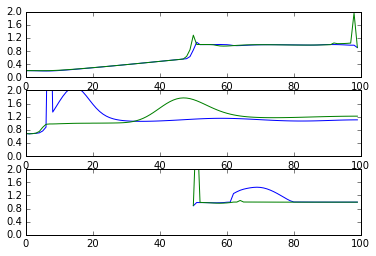

0.571655523077
[120.3269019486743, 120.48818235803347, 120.16401992194578]
cmax*dt/dx = 0.813530 
0.902334751664
0.680487552897
0.884392005669
max H(r)    1.956660 1.770820 3.667371
max H(0)    1.066921 7.260046 1.449602
59.6319407223
379.120915502


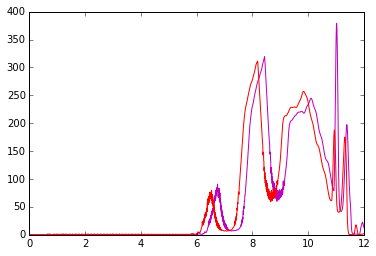

In [4]:
qi = [n0.q(i) for i in range(n0.Nedges)]
hi = [n0.getHofA(i) for i in range(3)]
hir = [nr.getHofA(i) for i in range(3)]
Ai = [qi[i][0:n0.Ns[i]] for i in range(3)]
Qi = [qi[i][n0.Ns[i]:] for i in range(3)] 
u= []
ymaxs = [ceil(max(h)) for h in hi]
for i in range(3):
        u.append([Qi[i][k]/Ai[i][k] for k in range(n0.Ns[i])])

fig,ax = plt.subplots(nrows = n0.Nedges)
x0 = [0,0,100.-n0.Ns[2]]
for k in range(n0.Nedges):
    x = np.arange(0,n0.Ls[k], n0.Ls[k]/n0.Ns[k])+x0[k]*np.ones(size(hi[k]))
    ax[k].plot(x,hi[k],'b')
    ax[k].plot(x,hir[k],'g')
    ax[k].set_ylim([0,ymaxs[i]])
    ax[k].set_xlim([0,100])
    ax[k].set_yticks(np.linspace(0,ymaxs[i],6))
plt.show()
print n0.getAveGradH(600)
umax = max(abs(max(ui)) for ui in u)
print n0.cmax
print "cmax*dt/dx = %f "%((max(n0.a)+umax)*dt/n0.Ls[0]*n0.Ns[0])
print hi[0][99]
print hi[1][0]
print hi[2][0]
 
print "max H(r)    %f %f %f"%(max(hir[0]), max(hir[1]), max(hir[2]))
print "max H(0)    %f %f %f"%(max(hi[0]), max(hi[1]), max(hi[2]))
Hbar = [n0.getAveGradH(i) for i in range(n0.M+1)]
Hbarr = [nr.getAveGradH(i) for i in range(nr.M+1)]
print mean(Hbar)
t = np.linspace(0,n0.T,n0.M+1)
plot(t,Hbar,'m')
plot(t,Hbarr,'r')
print max(Hbar)

In [5]:
ndof = 8

wn = np.array([1,2])
x0 = 0*np.ones(ndof*len(wn))
for i in range(ndof*len(wn)/2):
    x0[2*i+1] = 0
opt1 = PyBC_opt_dh(fi, fc0, ndof, x0, 1, wn)


opt1.compute_f()

f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype


f is 471.148231
T is 12.000000
Using Fourier modes


In [6]:
opt1.solve()

In [8]:
ndof2 = 16
x02 = np.zeros(ndof2*len(wn));
opt2 = PyBC_opt_dh(fi, fc0, ndof2, x02, 0, wn)
f02 = opt2.f
opt2.compute_f()


In [9]:

opt2.solve()
#opt1.x
#opt1.r


0.000251526293991
[-0.21923888053154197, 0.13292897739638052, -0.4512938251143002, 0.6093960591378651, -1.0855145286389825, -0.5861857072827584, 0.32127090593504193, -0.1579493164453052, -3.484230080778845e-05, -6.984951587665472e-05, 8.593006581095514e-05, 5.814890714517663e-05, 0.00017461978998044222, 9.603714171631424e-05, -7.216880872425926e-05, 7.823799393370714e-05]
max discrepancy is 1.772661e+00


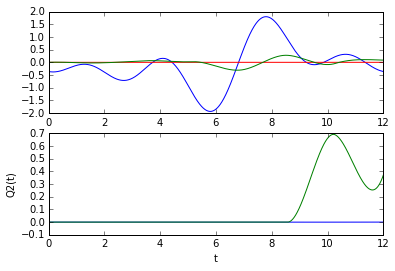

In [10]:
#import matplotlib.pyplot as plt

ff = opt1.f
ff2 = opt2.f
Q1 = opt1.getBCtimeseries(0)
Q2 = opt1.getBCtimeseries(1)
Q12 = opt2.getBCtimeseries(0)
Q22  = opt2.getBCtimeseries(1)
t = np.linspace(0,opt1.T, opt1.M+1)
fig,ax = plt.subplots(nrows = 2)

ax[0].plot(t,Q1,'b',t,np.zeros(opt1.M+1),'r')
ax[0].plot(t,Q12,'g')
xlabel('t')
ylabel('Q1(t)')
ax[1].plot(t,Q2,'b')#,t,np.zeros(opt1.M+1),'r')
ax[1].plot(t,Q22, 'g')
xlabel('t')
ylabel('Q2(t)')
print max(abs(Q2[i]) for i in range(len(Q2)))
print opt1.x
print "max discrepancy is %e"%max([Q1[i]-Q12[i] for i in range(len(Q1))])



In [11]:
print "                Fourier   Hermite"
print "CPU time (s)    %4.2f     %4.2f" % (opt1.solve_t, opt2.solve_t)
print "actual time (s) %4.2f      %4.2f" % (opt1.wsolve_t,opt2.wsolve_t)
print "WIN             %1.1f         %1.1f "%(opt1.solve_t/opt1.wsolve_t, opt2.solve_t/opt2.wsolve_t)
print "f0              %4.2f      %4.2f"%(f0,f0)
print "ff              %4.2f       %4.2f" %(ff,ff2)
print "f0/ff  =        %.5e %.5e"%(ff/f0, ff2/f0)
#print opt1.x

                Fourier   Hermite
CPU time (s)    1073.92     2399.97
actual time (s) 186.97      293.54
WIN             5.7         8.2 
f0              471.15      471.15
ff              14.83       228.84
f0/ff  =        3.14779e-02 4.85705e-01
